#📌 Extracción

In [46]:
import pandas as pd
import json
from pandas import json_normalize

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

print (df.head)

<bound method NDFrame.head of       customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             

#🔧 Transformación

In [47]:
df = json_normalize(df.to_dict(orient='records'))

df.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.tenure': 'tenure',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'Charges_Monthly',
    'account.Charges.Total': 'Charges_Total'
}, inplace=True)

df['Charges_Monthly'] = pd.to_numeric(df['Charges_Monthly'], errors='coerce')
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

print(df.head())
print(df.info())

   customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female             0     Yes        Yes       9   
1  0003-MKNFE    No    Male             0      No         No       9   
2  0004-TLHLJ   Yes    Male             0      No         No       4   
3  0011-IGKFF   Yes    Male             1     Yes         No      13   
4  0013-EXCHZ   Yes  Female             1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1             

In [48]:
columnas_relevantes = [
    'Churn', 'gender', 'SeniorCitizen', 'tenure', 'Contract', 'PaymentMethod',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Charges_Monthly', 'Charges_Total'
]
df = df[columnas_relevantes]

categoricas = [
    'Churn', 'gender', 'SeniorCitizen', 'Contract', 'PaymentMethod',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]
for col in categoricas:
    df[col] = df[col].astype('category')

df['Charges_Monthly'] = pd.to_numeric(df['Charges_Monthly'], errors='coerce').fillna(0)
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce').fillna(0)
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce').fillna(0)

df['AvgMonthlyCharge'] = df['Charges_Total'] / df['tenure'].replace(0, 1)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7267 non-null   category
 1   gender            7267 non-null   category
 2   SeniorCitizen     7267 non-null   category
 3   tenure            7267 non-null   int64   
 4   Contract          7267 non-null   category
 5   PaymentMethod     7267 non-null   category
 6   PhoneService      7267 non-null   category
 7   MultipleLines     7267 non-null   category
 8   InternetService   7267 non-null   category
 9   OnlineSecurity    7267 non-null   category
 10  OnlineBackup      7267 non-null   category
 11  DeviceProtection  7267 non-null   category
 12  TechSupport       7267 non-null   category
 13  StreamingTV       7267 non-null   category
 14  StreamingMovies   7267 non-null   category
 15  Charges_Monthly   7267 non-null   float64 
 16  Charges_Total     7267 n

In [49]:
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")



Número de filas duplicadas: 50


In [50]:
df = df.drop_duplicates()
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")

Número de filas después de eliminar duplicados: 7217


In [51]:
df['Cuentas_Diarias'] = df['Charges_Monthly'] / 30
print(df[['Charges_Monthly', 'Cuentas_Diarias']].head())

   Charges_Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [52]:
binarias = [
    'Churn', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]

# Reemplazar Sí/No por 1/0
for col in binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})  # algunos servicios tienen "No internet service"

# Verificar
print(df[binarias].head())

   Churn PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0    0.0            1            0.0               0             1   
1    0.0            1            1.0               0             0   
2    1.0            1            0.0               0             0   
3    1.0            1            0.0               0             1   
4    1.0            1            0.0               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
0                 0            1            1                0  
1                 0            0            0                1  
2                 1            0            0                0  
3                 1            0            1                1  
4                 0            1            1                0  


In [55]:
categoricas_multi = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
df = pd.get_dummies(df, columns=categoricas_multi, drop_first=True)


KeyError: "None of [Index(['gender', 'Contract', 'PaymentMethod', 'InternetService'], dtype='object')] are in the [columns]"

In [56]:
print(df.head())

   Churn SeniorCitizen  tenure PhoneService  MultipleLines  OnlineSecurity  \
0    0.0             0       9            1            0.0               0   
1    0.0             0       9            1            1.0               0   
2    1.0             0       4            1            0.0               0   
3    1.0             1      13            1            0.0               0   
4    1.0             1       3            1            0.0               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             1                 0            1            1  ...   
1             0                 0            0            0  ...   
2             0                 1            0            0  ...   
3             1                 1            0            1  ...   
4             0                 0            1            1  ...   

   AvgMonthlyCharge  Cuentas_Diarias  gender_Male  Contract_One year  \
0         65.922222         2.186667        False 

#📊 Carga y análisis

In [57]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas para análisis descriptivo:", list(numericas))

metricas = df[numericas].describe().T  # Transponer para mejor lectura
metricas['mediana'] = df[numericas].median()
metricas['rango'] = metricas['max'] - metricas['min']
metricas['varianza'] = df[numericas].var()
metricas['coef_var'] = df[numericas].std() / df[numericas].mean()  # Coeficiente de variación
print(metricas)

Columnas numéricas para análisis descriptivo: ['Churn', 'tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Charges_Monthly', 'Charges_Total', 'AvgMonthlyCharge', 'Cuentas_Diarias']
                   count         mean          std        min         25%  \
Churn             6993.0     0.263692     0.440666   0.000000    0.000000   
tenure            7217.0    32.563669    24.517339   0.000000    9.000000   
MultipleLines     6510.0     0.470661     0.499177   0.000000    0.000000   
OnlineSecurity    7217.0     0.287931     0.452830   0.000000    0.000000   
OnlineBackup      7217.0     0.346820     0.475991   0.000000    0.000000   
DeviceProtection  7217.0     0.345019     0.475407   0.000000    0.000000   
TechSupport       7217.0     0.291534     0.454500   0.000000    0.000000   
StreamingTV       7217.0     0.386587     0.487001   0.000000    0.000000   
StreamingMovies   7217.0     0.390190     0.48

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
0.0    5149
1.0    1844
Name: count, dtype: int64


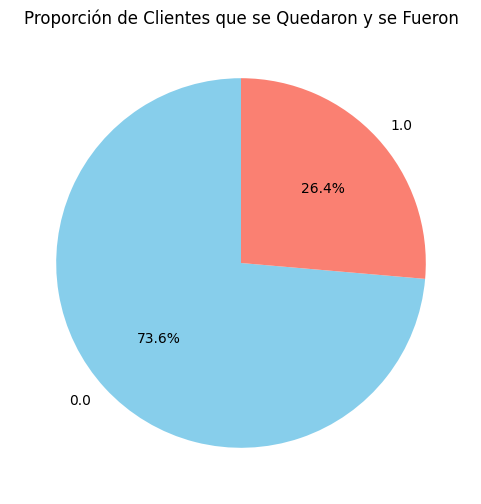

In [59]:
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue','salmon'], startangle=90)
plt.title('Proporción de Clientes que se Quedaron y se Fueron')
plt.show()

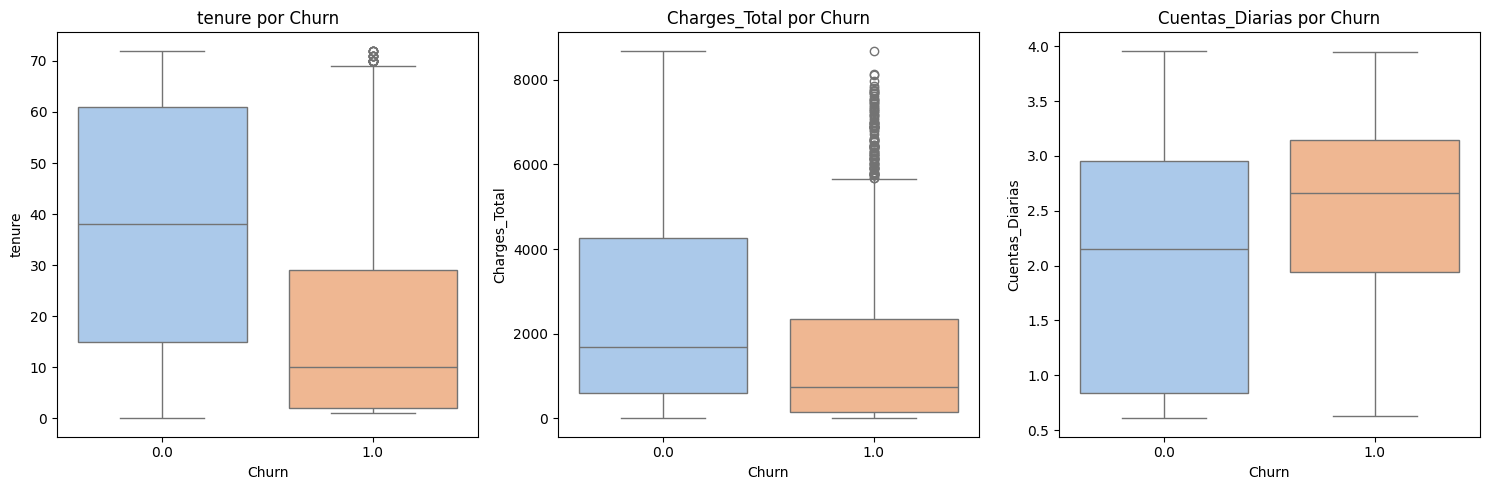

In [64]:
import math

numericas2 = ['tenure', 'Charges_Total', 'Cuentas_Diarias']

# Número de columnas y filas necesarias para subplots
n = len(numericas2)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5*cols, 5*rows))
for i, col in enumerate(numericas2, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Churn', y=col, data=df, hue='Churn', palette='pastel', dodge=False, legend=False)
    plt.title(f'{col} por Churn')
plt.tight_layout()
plt.show()


#📄Informe final

INTRODUCCIÓN

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) de Telecon X.  
Se busca identificar patrones de comportamiento en los clientes que se han dado de baja, comparando características demográficas, tipo de servicios contratados y facturación.

---

LIMPIEZA DE DATOS

Los pasos realizados fueron:

1. **Carga de datos** desde un JSON disponible en GitHub.  
2. **Aplanado de estructuras anidadas** (`customer`, `phone`, `internet`, `account`).  
3. **Renombrado de columnas** para mayor claridad.  
4. **Selección de columnas relevantes** para análisis de churn, excluyendo variables poco influyentes como `Partner`, `Dependents` y `PaperlessBilling`.  
5. **Conversión de datos categóricos a numéricos**, incluyendo:
   - Columnas binarias (`Yes`/`No`) → 1/0
   - `gender` → Male=1, Female=0
6. **Manejo de valores nulos** en campos numéricos (`Charges_Monthly`, `Charges_Total`, `tenure`).  
7. **Creación de columnas derivadas**, como:
   - `AvgMonthlyCharge` = `Charges_Total / tenure`
   - `Cuentas_Diarias` = `Charges_Monthly / 30`  
8. **Eliminación de duplicados** para garantizar la integridad de los datos.

---

ANÁLISIS EXPLORATORIO DE DATOS

### Distribución de Churn

Se realiza un análisis de los abandoonos, realizando conteo de clientes que abandonaron vs los que permanecen, además de crear distintos gráficos de variables que podrían identificar este patron de abandono.

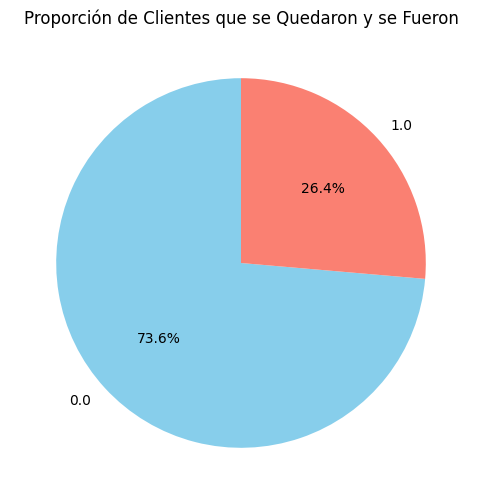

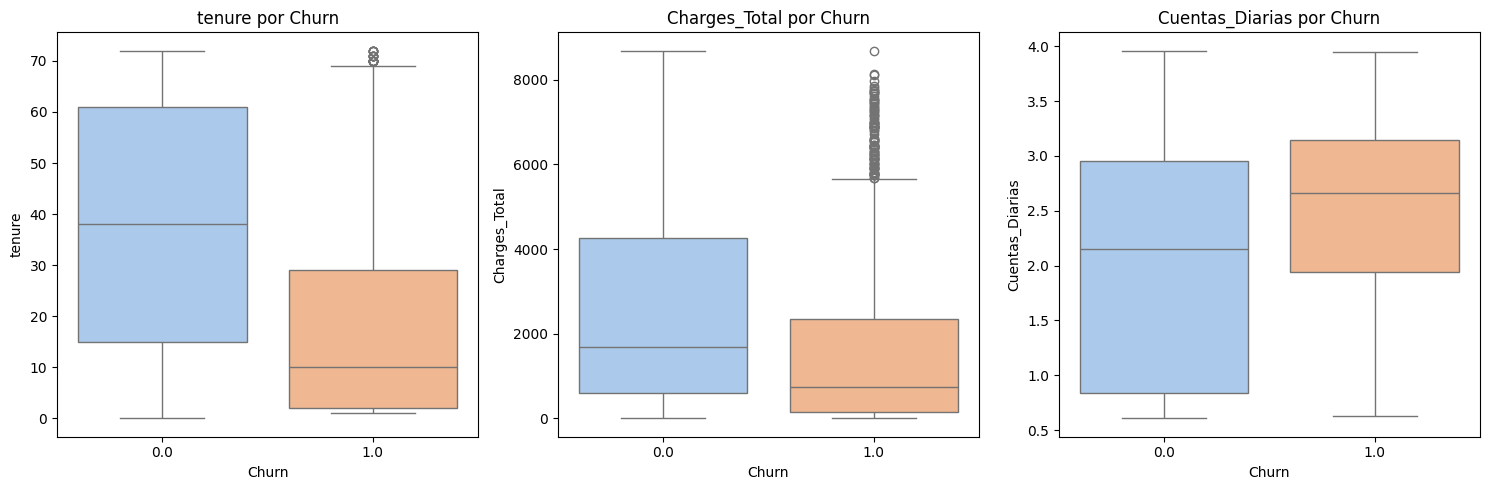

Observaciones:

Clientes con tenure menor tienden a abandonar más rápido.

Mayor Cuentas_Diarias no garantiza permanencia; se observan clientes con altos gastos que aún se van.

Charges_Total muestra que clientes con menor historial de pagos suelen tener mayor riesgo de churn.

CONCLUSIONES


La proporción de clientes que abandonan la empresa es significativa y requiere atención.

La duración del contrato (tenure) es un factor crítico: clientes recientes presentan mayor riesgo vs clientes más antiguos, quiere decir que campaña de fidelización nuevos clientes no es suficientemente atractiva.

Las facturaciones diarias y totales muestran correlaciones parciales con la evasión, pero no son determinantes únicos.

Servicios contratados (televisión, streaming, soporte técnico, internet) podrían influir; este análisis puede ampliarse con variables categóricas. Se recomienda ofrecer paquetes personalizados a clientes con mayor riesgo de churn.

